## Task 2 : Prediction using Supervised ML

### Name : Sampada Suryawanshi
### Objective : Predict the percentage of marks of an student based on the number of study hours

In [1]:
##Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [2]:
##import Dataset
dataset=pd.DataFrame({"Hours":[2.5,5.1,3.2,8.5,3.5,1.5,9.2,5.5,8.3,2.7,7.7,5.9,4.5,3.3,1.1,8.9,2.5,1.9,6.1,7.4,2.7,4.8,3.8,6.9,7.8],
                     "Scores":[21,47,27,75,30,20,88,60,81,25,85,62,41,42,17,95,30,24,67,69,30,54,35,76,86]})

print(len(dataset))
dataset.head(3)


25


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27


In [3]:
##Shape of data
print("Dimension of Dataset is:",dataset.shape)
###(rows,coloum)

Dimension of Dataset is: (25, 2)


In [4]:
dataset.columns

Index(['Hours', 'Scores'], dtype='object')

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
Hours     25 non-null float64
Scores    25 non-null int64
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
dataset.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### There are four assumption associated with a Simple Linear Regression.

- Linearity        :   The relationship between X and the mean of Y is linear.
- Homoscedasticity :   The Variance of residual is the same for any value of X.  
- Independence     :   Observation are independent of each other.
- Normality        :   For any fixed value of X,Y is normally distributed.


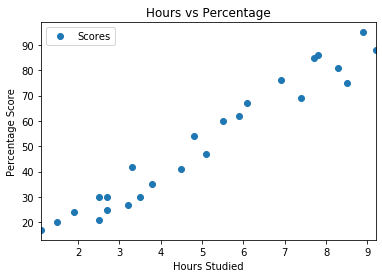

In [7]:
##Assumption1 : Checking the Linear Relationship between variables.
# Plotting the distribution of score
dataset.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show();

###### From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

#### Now rest of the assumptions require us to perform the regression before we can even check for them. So let's perform regression on it.

### Preparing the data

In [8]:
X = dataset.iloc[:, :-1].values  
y = dataset.iloc[:, 1].values  

In [9]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                            test_size=0.2, random_state=0) 

In [10]:
from sklearn.linear_model import LinearRegression  
Reg = LinearRegression()  
Reg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
#print(X_train)
pred_y=Reg.predict(X_train)
pred_y

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [13]:
print("R squared: {}".format(r2_score(y_true=y_train,y_pred=pred_y)))

R squared: 0.9515510725211552


### Mean of Residuals

##### Residuals as we know are the differences between the true value and the predicted value. One of the assumptions of linear regression is that the mean of the residuals should be zero. So let's find out. 

In [14]:
residuals = y_train-pred_y
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals -3.2862601528904635e-15


#### Very close to zero so all good here.

### Assumption2 : Check for Homoscedasticity
###### Homoscedasticity means that the residuals have equal or almost equal variance across the regression line. 

    Goldfeld Quandt Test
    Checking heteroscedasticity : Using Goldfeld Quandt we test for heteroscedasticity.

      Null Hypothesis: Error terms are homoscedastic
      Alternative Hypothesis: Error terms are heteroscedastic.

In [15]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
name = ['F statistic', 'p-value']
test = sms.het_goldfeldquandt(residuals, X_train)
lzip(name, test)

[('F statistic', 1.1226644440590647), ('p-value', 0.4329901993972065)]

###### Since p value is more than 0.05 in Goldfeld Quandt Test, we can't reject it's null hypothesis that error terms are homoscedastic. Good.


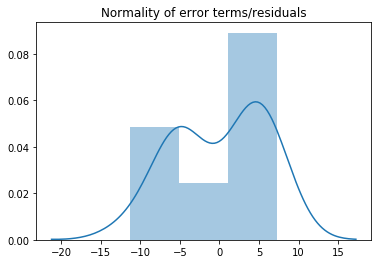

In [16]:
p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')


###### From above graph we can't say that whether data is normal or not.But We know that,the central limit theorem which says that as the sample size increases the distribution tends to the normal. Here  sample size is very small but if we increase it our data will go to normal .

#### So here we have checked all the assumptions and can safely conclude that all assumptions are satisfied for our data.

### Making Predictions 

In [17]:
#print(X_test) # Testing data - In Hours
y_pred = Reg.predict(X_test) # Predicting the scores
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

In [18]:
# Comparing Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


#### **Evaluating the model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [19]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002975


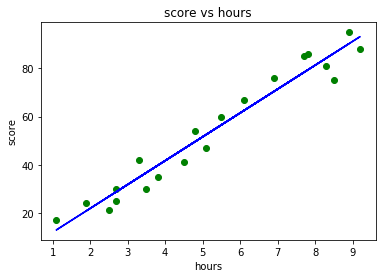

In [20]:
# Plotting for the test data
plt.scatter(X_train, y_train,color="green")
plt.plot(X_train,Reg.predict(X_train),color="blue")
plt.title("score vs hours")
plt.xlabel("hours")
plt.ylabel("score")

plt.show()

In [21]:
# You can also test with your own data
hours =np.array(9.25)
hours=hours.reshape(-1,1)
new_pred = Reg.predict(hours)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(new_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737538
